# Introducción al Aprendizaje Automatizado

## Trabajo Práctico Nro 1

## Inés Cipullo

###2023

## Ejercicio 1

A continuación, el código utilizado en el Trabajo Práctico Nro 0 para generar y graficár datos correspondientes al problema de las espirales anidadas.

Notar que el código fue levemente modificado (sin cambiar su funcionalidad) para adaptarlo al uso de los siguientes ejercicios.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class Circular2DUniformDistribution:
	def __init__(self):
		self.dimension = 2
		self.radius = 1

	def generate_sample(self, sample_size: int):
		count = {"0": 0, "1": 0}
		cat_size = sample_size // 2
		x_values = []
		y_values = []
		categories = []

		while count["0"] < cat_size or count["1"] < cat_size:
			theta = np.random.uniform(0, 2*np.pi, 1).tolist()[0]
			radius = np.sqrt(np.random.uniform(0, self.radius, 1).tolist()[0])
			category = self._get_category(theta, radius)

			if count[f"{category}"] < cat_size:
				count[f"{category}"] += 1
				x_values.append(radius * np.cos(theta))
				y_values.append(radius * np.sin(theta))
				categories.append(category)

		return pd.DataFrame({"X": x_values, "Y": y_values, "Class": categories})

	def _get_category(self, theta, ro):
		r1 = self._curve_1(theta)
		r2 = self._curve_2(theta)
		if r1 < ro and ro < r2:
			return 0

		r1p = self._curve_1(theta + 2 * np.pi)
		r2p = self._curve_2(theta + 2 * np.pi)
		if r1p < ro and ro < r2p:
			return 0
	
		return 1

	def _curve_1(self, theta):
		return theta / (4 * np.pi)
	
	def _curve_2(self, theta):
		return (theta + np.pi) / (4 * np.pi)


def plot2(dataframe):
	colors = dataframe["Class"].map({0: 'b', 1: 'r'})
	dataframe.plot(x="X", y="Y", kind='scatter', c=colors)
	plt.show()

Se generan 4 dataframes panda que contienen puntos en coordenadas cartesianas dentro del círculo de radio 1 con centro en `(0,0)`, y su clasificación en `1` o `0`, según su ubicación, donde la clase `0` corresponde a los puntos que se encuentran entre las curvas `r = θ/4π` y `r = (θ + π)/4π` (en polares) y la clase `1` al resto. Los dataframes de 150, 600 y 3000 puntos serán utilizados como datos de entrenamiento, mientras que el dataframe de 10000 puntos será utilizado para testear los árboles entrenados.

In [ ]:
data_gen = Circular2DUniformDistribution()
train_data_150 = data_gen.generate_sample(150)
train_data_600 = data_gen.generate_sample(600)
train_data_3000 = data_gen.generate_sample(3000)
test_data_sample = data_gen.generate_sample(10000)

La siguiente clase toma en su instanciación el conjunto de test. Con el método `for_dataframe` que toma un dataframe de entrenamiento, permite extrar los datos de entrenamiento y su respectiva clasificación, generar un árbol de decisión, entrenarlo con el conjunto de entrenamiento dado y luego predicir la clasificación de los datos de test y graficarlos. De esta manera, se entrenarán y graficarán las predicciones sobre el conjunto de test de los 3 conjuntos de entrenamientos generados.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


class TrainAndTestDecisionTree:
  """Given one training dataframe and ones testing dataframe, both generated with Circular2DUniformDistribution,
  it trains a decision tree with the training dataframe, then predicts the classification of the test data and
  plots it."""
  def __init__(self, test_df):
    self.test_df = test_df

  def for_dataframe(self, df):
    data, target = self._get_data_and_target(df)
    trained_decision_tree = self._train_decision_tree(data, target)
    test_df_with_prediction = self._test_decision_tree(trained_decision_tree)
    plot2(test_df_with_prediction)

  def _get_data_and_target(self, dataframe):
    """Given a dataframe generated with Circular2DUniformDistribution, splits it into data and target."""
    data = list(map(list, zip(dataframe["X"], dataframe["Y"])))
    target = dataframe["Class"].values.tolist()
    return data, target

  def _train_decision_tree(self, data, target):
    decision_tree = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.005, random_state=0, min_samples_leaf=5)
    return decision_tree.fit(data, target)
  
  def _test_decision_tree(self, decision_tree):
    test_data, test_target = self._get_data_and_target(self.test_df)
    prediction = decision_tree.predict(test_data)
    for i in range(len(prediction)):
        test_data[i].append(prediction[i])
    return pd.DataFrame(test_data, columns=["X", "Y", "Class"])


train_and_test_decision_tree = TrainAndTestDecisionTree(test_df=test_data_sample)
train_and_test_decision_tree.for_dataframe(train_data_150)
train_and_test_decision_tree.for_dataframe(train_data_600)
train_and_test_decision_tree.for_dataframe(train_data_3000)

###Resultados del test

####Predicción de árbol entrenado con conjunto de longitud 150
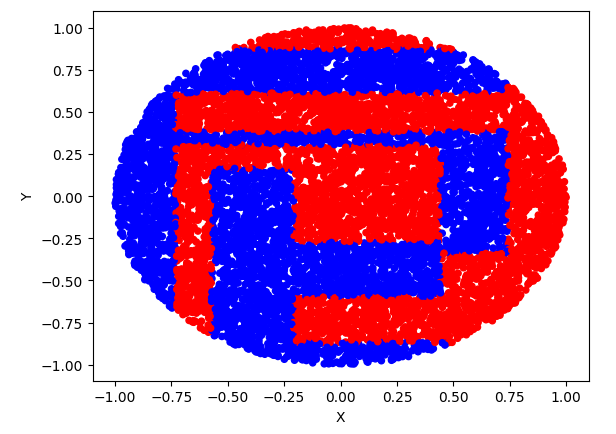

####Predicción de árbol entrenado con conjunto de longitud 600
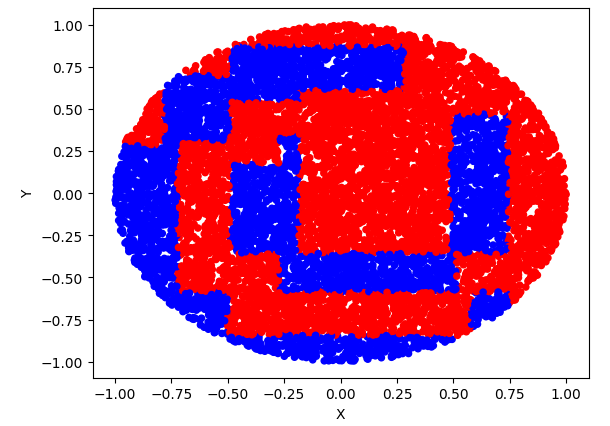

####Predicción de árbol entrenado con conjunto de longitud 3000
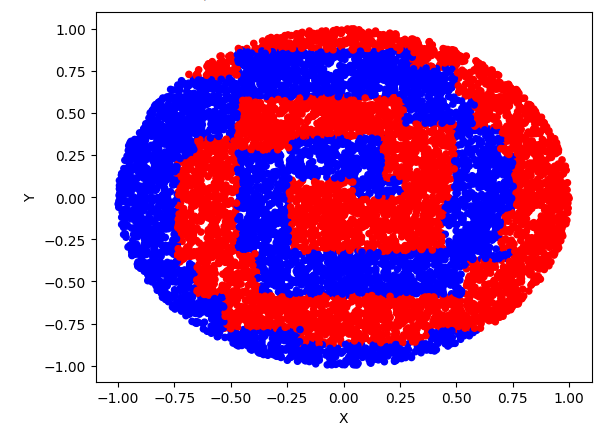


Primero que nada, es inevitable notar lo obvio, a mayor tamaño de conjunto de entrenamiento, mejor la predicción sobre el conjunto de test, cada vez son más evidentes las espirales anidadas. También se puede observar que la zona donde más cuesta ajustar la predicción es en el centro, donde hasta con un conjunto de entrenamiento de 3000 puntos no es tan preciso. 

Otra cosa que se destaca son las líneas casi rectas que limitan los puntos de una clase de los de la otra, cosa que se puede distinguir independientemente del tamaño del conjunto de entrenamiento. Creemos que este fenómeno se debe a que los árboles de decisión en cada clasificación dividen de forma lineal los datos.

Una curiosadad para gregar es que los extremos de los espirales, donde cada vez hay menos puntos con determinada clasificación, fueron mejor aproximados por el árbol entrenado con un conjunto de 600 puntos, que por el árbol entrenado con un conjunto de 3000 puntos, esto igualmente puede deberse a la aletoreidad de los conjuntos al ser generados.

## Introducción ejercicios 2, 3 y 4

A continuación, el código utilizado en el Trabajo Práctico Nro 0 para generar  datos de acuerdo a la distribución normal. Al sample A lo llamaremos datos diagonales y al sample B, datos paralelos.

Notar que el código fue levemente modificado (sin cambiar su funcionalidad) para adaptarlo al uso de los siguientes ejercicios.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class MultidimensionalGaussianDistribution:
	"""Generate multidimensional points sample according to the Gaussian Distribution.

	Values generated equally in two different categories.
	Sample A:
	0: gaussian distribution with center (-1, -1, ..., -1)
	1: gaussian distribution with center (1, 1, ..., 1)
	Sample B:
	0: gaussian distribution with center (-1, 0, ..., 0)
	1: gaussian distribution with center (1, 0, ..., 0)
	"""

	def generate_sample_a(self, n: int, dimension: int, C: float):
		center_0 = np.ones(dimension) * -1
		center_1 = np.ones(dimension)
		variance = (C * np.sqrt(dimension))**2

		sample_0 = self._sample_with_center_and_variance(n, dimension, center_0, variance, 0)
		sample_1 = self._sample_with_center_and_variance(n, dimension, center_1, variance, 1)

		columns = [f"Dim{i+1}" for i in range(dimension)]
		columns.append("Class")

		dataframe = pd.DataFrame(sample_0+sample_1, columns=columns)
		return dataframe

	def generate_sample_b(self, n: int, dimension: int, C: float):
		center_0 = np.append(np.ones(1), np.zeros(dimension-1))
		center_1 = np.append(np.ones(1)*-1, np.zeros(dimension-1))
		variance = C**2

		sample_0 = self._sample_with_center_and_variance(n, dimension, center_0, variance, 0)
		sample_1 = self._sample_with_center_and_variance(n, dimension, center_1, variance, 1)

		columns = [f"Dim{i+1}" for i in range(dimension)]
		columns.append("Class")

		dataframe = pd.DataFrame(sample_0+sample_1, columns=columns)
		return dataframe


	def _sample_with_center_and_variance(self, n: int, dimension: int, center, variance, category):
		covariance_matrix = np.identity(dimension) * (variance**2)
		
		sample = np.random.multivariate_normal(mean=center, cov=covariance_matrix, size=n//2)

		sample_with_class = [point + [category] for point in sample.tolist()]
		return sample_with_class


def plot_df(dataframe, title):
	colors = dataframe["Class"].map({0: 'b', 1: 'r'})
	dataframe.plot(x="Dim1", y="Dim2", kind='scatter', c=colors)
	plt.title(title)
	plt.show()

La siguiente clase permite generar datasets de datos diagonales y paralelos. Para la generación de un dataset se necesitan 3 parámetros: la dimensión, el desvío estandar y la cantidad de puntos. Para poder generar datasets comparables, se varía uno de los 3 parámetros, dejando los otros dos fijos. La clase cuenta con 3 funciones que permiten justamente eso, fijar dos de los parámetros y variar el otro. En cada llamada se generan los datasets de test y 20 datasets de entrenamiento por cada valor del parámetro que varía. Por cada dataset de entrenamiento, se crea un árbol de decisión, se entrena, se testea y se guardan algunas métricas para luego graficar sus promedios.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB


class TrainAndTestDecisitionTreeWithVaryingParameters:
  def __init__(self):
    self.df_generator = MultidimensionalGaussianDistribution()
    self.test_sample_size = 10000
    self.test_errors = {}
    self.train_errors = {}
    self.minimum_errors = {}
    self.tree_sizes = {}
    self.titles = {
      "a": "Tree prediction of Sample A trained with dataframe where n = ",
      "b": "Tree prediction of Sample B trained with dataframe where n = ",
    }

  def varying_sample_sizes(self, sample_sizes: list[int], dimension: int, C: float):
    """Ejercicio 2 - Sobreajuste."""

    test_df_a = self.df_generator.generate_sample_a(n=self.test_sample_size, dimension=dimension, C=C)
    test_df_b = self.df_generator.generate_sample_b(n=self.test_sample_size, dimension=dimension, C=C)

    for n in sample_sizes:
      self.test_errors[f"{n}"] = {"a": [], "b": []}
      self.train_errors[f"{n}"] = {"a": [], "b": []}
      self.tree_sizes[f"{n}"] = {"a": [], "b": []}
      
      for i in range(20):
        df_a = self.df_generator.generate_sample_a(n=n, dimension=dimension, C=C)
        df_b = self.df_generator.generate_sample_b(n=n, dimension=dimension, C=C)
        self._train_and_test_tree_for_df(df_a, test_df_a, n, (i==0), "a")
        self._train_and_test_tree_for_df(df_b, test_df_b, n, (i==0), "b")

    self._plot_errors(False)
    self._plot_tree_sizes()

  def varying_C(self, sample_size: int, dimension: int, Cs: list[float]):
    """Ejercicio 3 - Resistencia al ruido."""

    for C in Cs:
      self.test_errors[f"{C}"] = {"a": [], "b": []}
      self.train_errors[f"{C}"] = {"a": [], "b": []}
      self.tree_sizes[f"{C}"] = {"a": [], "b": []}
      self.minimum_errors[f"{C}"] = {"a": [], "b": []}

      test_df_a = self.df_generator.generate_sample_a(n=self.test_sample_size, dimension=dimension, C=C)
      test_df_b = self.df_generator.generate_sample_b(n=self.test_sample_size, dimension=dimension, C=C)

      for i in range(20):
        df_a = self.df_generator.generate_sample_a(n=sample_size, dimension=dimension, C=C)
        df_b = self.df_generator.generate_sample_b(n=sample_size, dimension=dimension, C=C)
        self._train_and_test_tree_for_df(df_a, test_df_a, C, False, "a")
        self._train_and_test_tree_for_df(df_b, test_df_b, C, False, "b")
        self._calculate_minimum_error(df_a, test_df_a, C, "a")
        self._calculate_minimum_error(df_b, test_df_b, C, "b")

    self._plot_errors(True)

  def varying_dimension(self, sample_size: int, dimensions: list[int], C: float):
    """Ejercicio 4 - Dimensionalidad."""

    for d in dimensions:
      self.test_errors[f"{d}"] = {"a": [], "b": []}
      self.train_errors[f"{d}"] = {"a": [], "b": []}
      self.tree_sizes[f"{d}"] = {"a": [], "b": []}

      test_df_a = self.df_generator.generate_sample_a(n=self.test_sample_size, dimension=d, C=C)
      test_df_b = self.df_generator.generate_sample_b(n=self.test_sample_size, dimension=d, C=C)

      for i in range(20):
        df_a = self.df_generator.generate_sample_a(n=sample_size, dimension=d, C=C)
        df_b = self.df_generator.generate_sample_b(n=sample_size, dimension=d, C=C)
        self._train_and_test_tree_for_df(df_a, test_df_a, d, False, "a")
        self._train_and_test_tree_for_df(df_b, test_df_b, d, False, "b")

    self._plot_errors(False)

  def _train_and_test_tree_for_df(self, df, test_df, var, plot: bool, sample: str):
    data, target = self._get_data_and_target(df)
    test_data, test_target = self._get_data_and_target(test_df)

    trained_decision_tree = self._train_decision_tree(data, target)
    test_df_with_prediction = self._test_decision_tree(trained_decision_tree, test_df)
    train_df_with_prediction = self._test_decision_tree(trained_decision_tree, df)

    self.test_errors[f"{var}"][sample].append(1 - accuracy_score(test_target, test_df_with_prediction["Class"]))
    self.train_errors[f"{var}"][sample].append(1 - accuracy_score(target, train_df_with_prediction["Class"]))
    self.tree_sizes[f"{var}"][sample].append(trained_decision_tree.tree_.node_count)

    if plot:
      plot_df(test_df_with_prediction, self.titles[sample]+f"{var}.\n")

  def _get_data_and_target(self, dataframe):
    """Given a dataframe generated with MultidimensionalGaussianDistribution with dimension=2, splits it into data and target."""
    data = dataframe[dataframe.columns[:-1]]
    target = dataframe["Class"].values.tolist()
    return data, target

  def _train_decision_tree(self, data, target):
    decision_tree = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.005, random_state=0, min_samples_leaf=5)
    return decision_tree.fit(data, target)
  
  def _test_decision_tree(self, decision_tree, test_df):
    test_data, _ = self._get_data_and_target(test_df)
    prediction = decision_tree.predict(test_data)
    test_data["Class"]=prediction
    return pd.DataFrame(test_data)

  def _calculate_minimum_error(self, train_df, test_df, C, sample):
    train_data, train_target = self._get_data_and_target(train_df)
    test_data, test_target = self._get_data_and_target(test_df)
    gnb = GaussianNB()
    pred_target = gnb.fit(train_data, train_target).predict(test_data)
    error = (test_target != pred_target).sum() / len(test_target)
    self.minimum_errors[f"{C}"][sample].append(error)

  def _plot_errors(self, include_minimum: bool):
    x = []
    y_a_test = []
    y_b_test = []
    y_a_train = []
    y_b_train = []
    for n in self.test_errors.keys():
      x.append(float(n))
      y_a_test.append(np.mean(self.test_errors[n]["a"]))
      y_b_test.append(np.mean(self.test_errors[n]["b"]))
      if not include_minimum:
        y_a_train.append(np.mean(self.train_errors[n]["a"]))
        y_b_train.append(np.mean(self.train_errors[n]["b"]))
      else:
        y_a_train.append(np.mean(self.minimum_errors[n]["a"]))
        y_b_train.append(np.mean(self.minimum_errors[n]["b"]))
    plt.plot(x, y_a_test, linestyle='dashed', marker='s', label="Test error - Sample A")
    plt.plot(x, y_b_test, linestyle='dashed', marker='s', label="Test error - Sample B")
    label_extra_a = "Train error - Sample A" if not include_minimum else "Minimum error - Sample A"
    label_extra_b = "Train error - Sample B" if not include_minimum else "Minimum error - Sample B"
    plt.plot(x, y_a_train, linestyle='dashed', marker='s', label=label_extra_a)
    plt.plot(x, y_b_train, linestyle='dashed', marker='s', label=label_extra_b)
    plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
    plt.title("Promedio del error sobre conjuntos de test y de entreno.")
    # Descomentar la siguiente linea para habilitar escala logaritmica en el eje x (ej 2)
    # plt.xscale('log')
    plt.show()

  def _plot_tree_sizes(self):
    x = []
    y_a = []
    y_b = []
    for n in self.tree_sizes.keys():
      x.append(int(n))
      y_a.append(np.mean(self.tree_sizes[n]["a"]))
      y_b.append(np.mean(self.tree_sizes[n]["b"]))
    plt.plot(x, y_a, linestyle='dashed', marker='s', label="Sample A")
    plt.plot(x, y_b, linestyle='dashed', marker='s', label="Sample B")
    plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
    plt.title("Promedio de cantidad de nodos del arbol s/ N")
    plt.xscale('log')
    plt.show()


## Ejercicio 2

Se generan datasets con las características antes explicadas con `C = 0.78`, `dimension = 2` y variando el valor de `n` según la siguiente lista: `125, 250, 500, 1000, 2000, 4000` para el conjunto de entrenamiento y `n = 10000` para el conjunto de test. Se obtienen graficos de los puntos del conjunto de test según la clasificación predicha por los árboles entrenados para los distintos valores de `n` (un gráfico por cada valor de `n`). A su vez, se obtienen un gráfico con los valores promediados de train y test error y otro gráfico con el promedio de la cantidad de nodos de los árboles generados. Ambos gráficos en función de `n` y con los dos conjuntos de datos (diagonal y paralelo).

In [ ]:
train_and_test_decision_tree = TrainAndTestDecisitionTreeWithVaryingParameters()
train_and_test_decision_tree.varying_sample_sizes(sample_sizes=[125,250,500,1000,2000,4000], dimension=2, C=0.78)

### Resultados

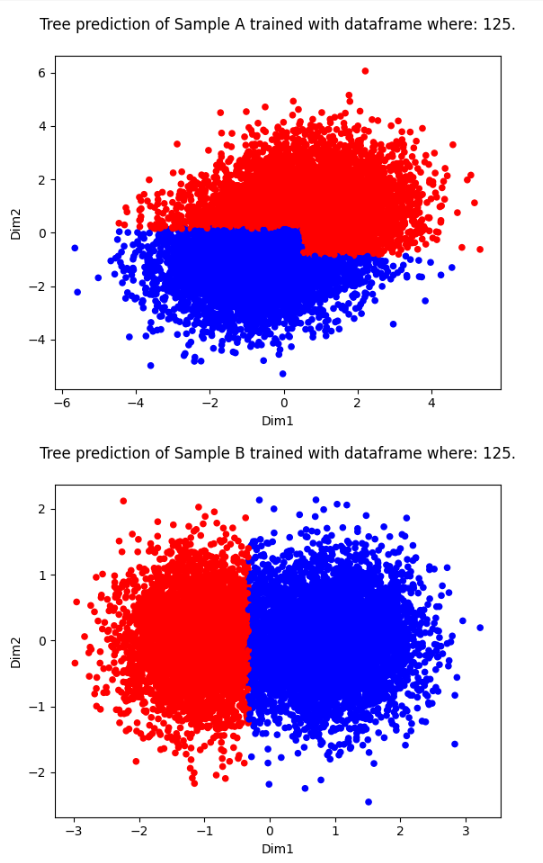

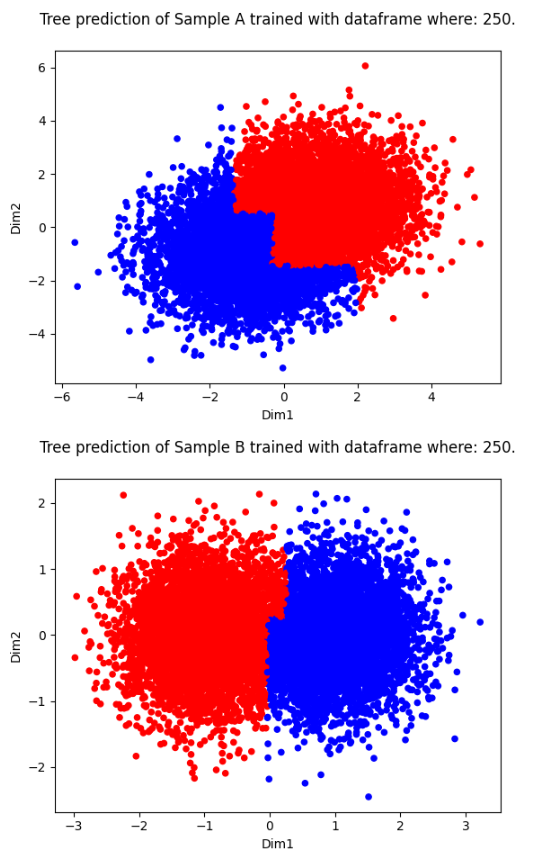

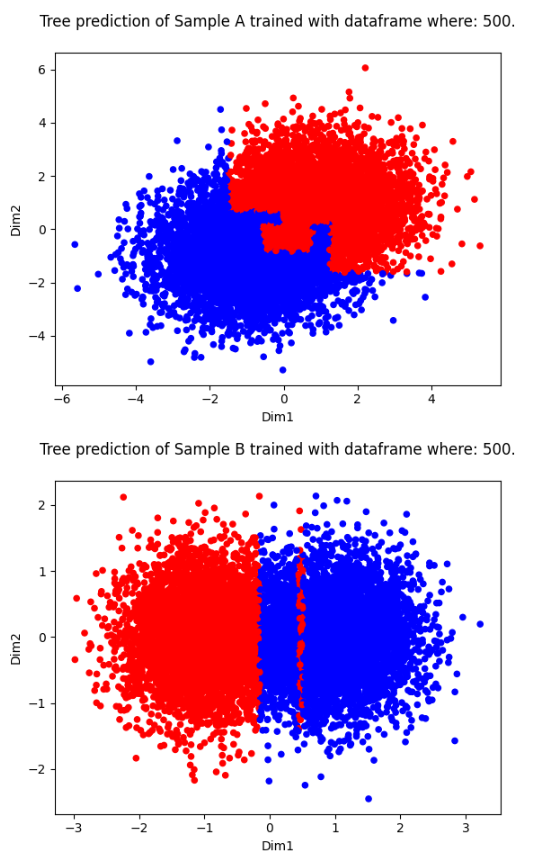

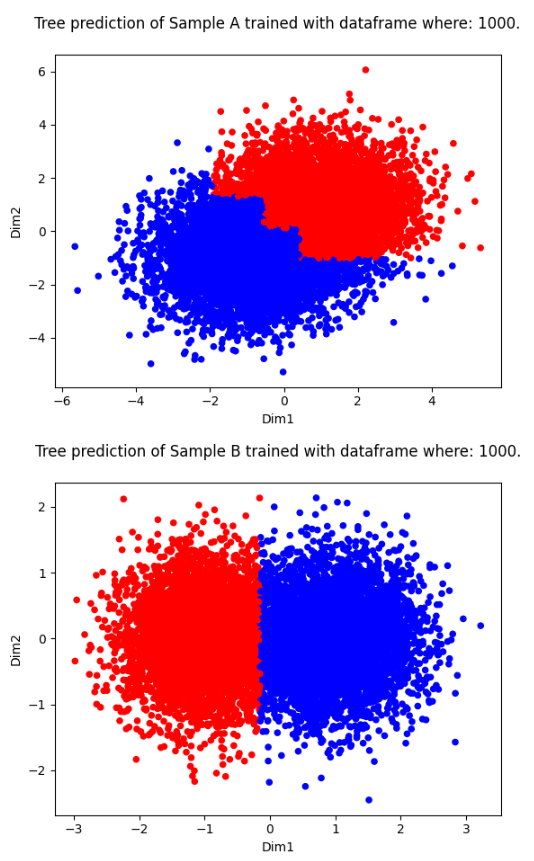

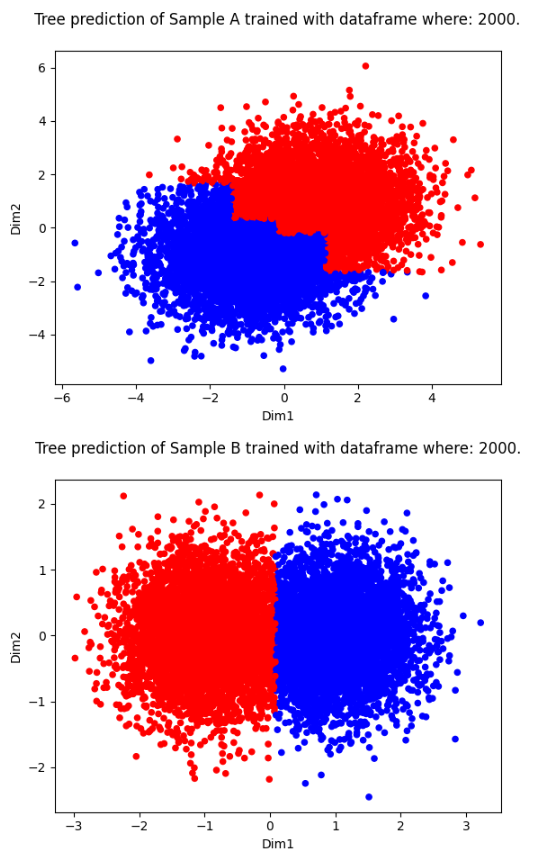

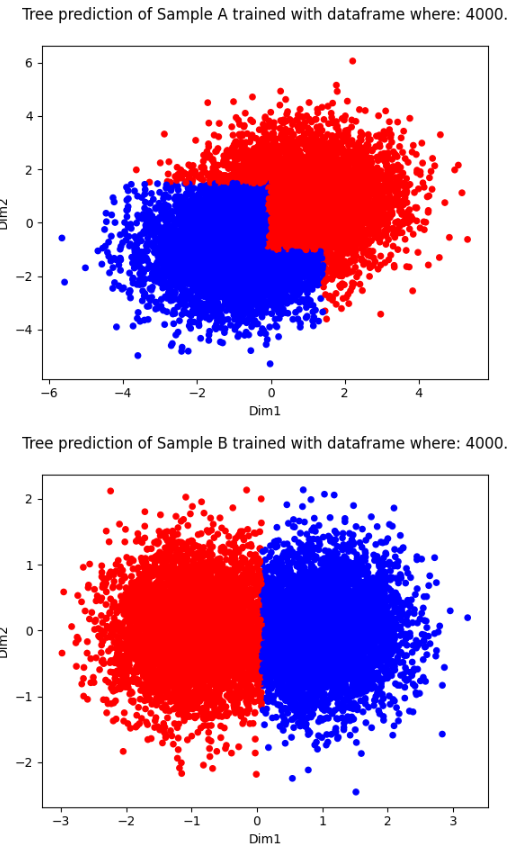 

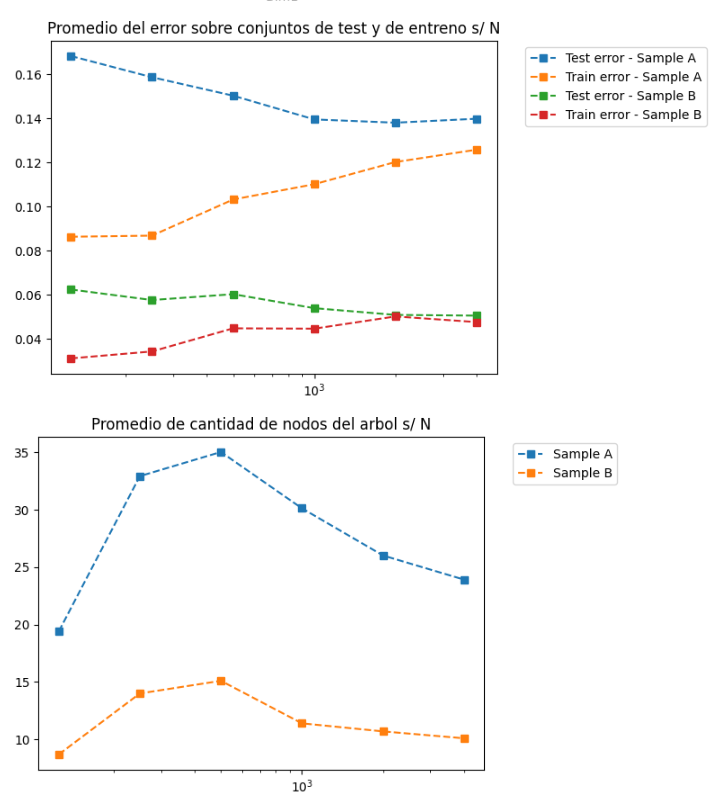

Notamos que para el conjunto de datos paralelos, las predicciones son altamente similares independientemente del valor de `n`, creemos que es porque la mejor clasificación es significativamente más sencilla de obtener para un árbol de decisión. Para el conjunto de datos diagonales, notamos que a medida que aumenta el valor de `n` aumentan los "escalones" de la división entre las clases, aunque esto no se cumple siempre. Creemos que la mejor clasificación es una recta con inclinación negativa que pase por el `(0,0)` (o casi), lo cual es significativamnete más complejo de obtener con un árbol de decisión.

Gráficos de las métricas:

En cuanto a los errores de las predicciones, se observa que los errores de test decrecen a medida que aumenta la cantidad de puntos con los se entrena, lo cual es esperable, pero el error sobre el conjunto de entrenamiento en algunos casos aumenta a medida que aumenta `n`, lo cual resulta antiintuitivo pero puede reflejar que las condiciones de parada para evitar sobreajuste son precisas y evitan sobreajuste, posiblemente sobre ruido. También se observa que ambos errores (de test y de entreno) tienden a un mismo valor a medida que aumenta `n`, este es el menor error que se puede conseguir, ya que muchos puntos pertenecen a las dos clases que se quieren distinguir (la clasificación es no determinista).

Por su parte, la cantidad de nodos de los árboles es menor (y similar) cuando el tamaño del conjunto de datos es pequeño o lo suficientemente grande, esto nos hace pensar que hay un tamaño de conjunto de datos de entrenamiento (500) para estos problemas en particular que no se lleva muy bien con las condiciones de parada establecidas.

## Ejercicio 3
(Incluyendo 3.1)

Se generan datasets con las características antes explicadas con `dimension = 5`, `n = 250` para el conjunto de entrenamiento y `n = 10000` para el de test, variando el valor de `C` según la siguiente lista: `0.5, 1, 1.5, 2, 2.5`. Se obtiene un gráfico con los valores promediados del test error en función de `C` para ambos conjuntos de datos, y con los valores promediados del mínimo error posible para este problema.

El mínimo error se obtiene a partir del algoritmo de clasficación "Gaussian Naive Bayes". Este implementa el clasificador de Bayes a partir del teorema de Bayes, el cual resulta en el clasificador ideal para el problema dado. El algoritmo es Gaussiano porque asume que la probabilidad de elección de cierto punto es gaussiana, como en este caso. Para calcular el error mínimo se mide cuántos puntos son mal clasificados por ese clasificador ideal.

In [ ]:
train_and_test_decision_tree = TrainAndTestDecisitionTreeWithVaryingParameters()
train_and_test_decision_tree.varying_C(sample_size=250, dimension=5, Cs=[0.5,1,1.5,2,2.5])

### Resultados

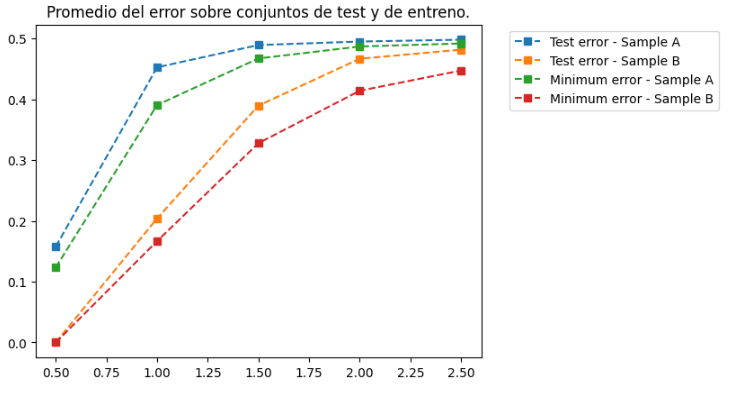

Los errores mínimos son considerablemente mayores para el conjunto de datos diagonales, por sobre el conjunto de datos paralelos, porque en ese conjunto de datos hay mayor probabilidad de que un punto pertenezca a más de una clasificación.

Podemos observar que para el conjunto de datos diagonales, según aumenta el valor de `C`, disminuye la diferencia entre el error de test y el error mínimo posible, y tiende a ocurrir lo contrario para el conjunto de datos paralelos. De esto se puede asumir que las predicciones sobre el conjunto de datos diagonales es mejor para valores de `C` grandes y las predicciones sobre el conjunto de datos paralelos es mejor para valores de `C` pequeños, lo cual se traduce a que las predicciones sobre el conjunto de datos diagonales son restintes al ruido y aquellas sobre los datos paralelos, no tanto.

## Ejercicio 4

Se generan datasets con las características antes explicadas con `C = 0.78`, `n = 250` para el conjunto de entrenamiento y `n = 10000` para el de test, variando el valor de `dimension` según la siguiente lista: `2, 4, 8, 16, 32`. Se obtiene un gráfico con los valores promediados del train y test error en función de `dimension` para ambos conjuntos de datos.

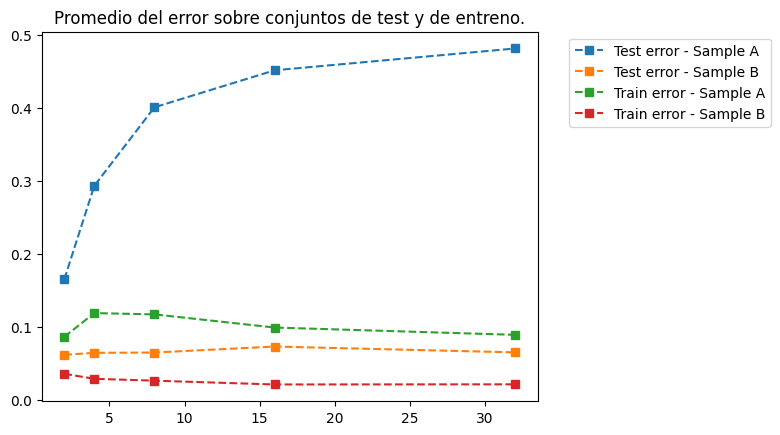

In [3]:
train_and_test_decision_tree = TrainAndTestDecisitionTreeWithVaryingParameters()
train_and_test_decision_tree.varying_dimension(sample_size=250, dimensions=[2,4,8,16,32], C=0.78)

### Resultados

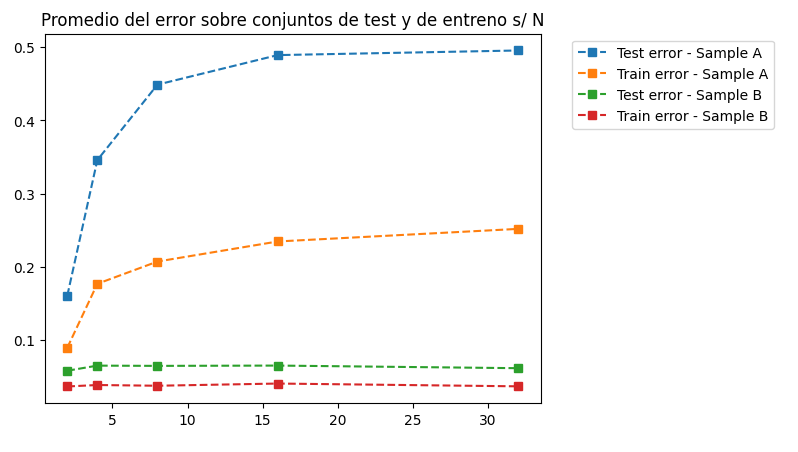

Vemos como para el conjunto de datos diagonales la tendencia es que aumente el error a medida que aumenta la dimensión de los puntos, esto se podría atribuir a que a mayor dimensión, más valores que deben ser predichos. Pero el error de predicción para el conjunto de datos paralelo se mantiene estable por más que aumente la dimensión, podria decirse que no lo afecta la dimensionalidad.

También se observa que los errores sobre el conjunto de datos paralelos son significativamente menores a los errores sobre el conjunto de datos diagonales, suponemos que esto ocurre porque los puntos se encuentran mucho menos superpuestos y su mejor clasificación es significativamente más sencilla de obtener para un árbol de decisión.

## Ejercicio 5

Se descarga un sample de 200 puntos clasificados según el problema XOR y se grafican los puntos en distintos colores según su clasificación. Además, se genera un árbol de decisión con los parámetros dados, se lo entrena con dicho conjunto de datos y se grafica el árbol resultante.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def plot_df(dataframe, title):
	colors = dataframe["Class"].map({0: 'b', 1: 'r'})
	dataframe.plot(x="X", y="Y", kind='scatter', c=colors)
	plt.title(title)
	plt.show()
 
def get_data_and_target(dataframe):
  data = list(map(list, zip(dataframe["X"], dataframe["Y"])))
  target = dataframe["Class"].values.tolist()
  return data, target
 
def read_data_sample_and_plot():
  xor_url = 'https://github.com/inescipullo/IAA/raw/main/TP1/xor.csv'
  xor_df = pd.read_csv(xor_url)
  first_row = [-0.849238563188574, -0.401593066194647, 0]
  xor_df.rename(columns={str(first_row[0]): "X", str(first_row[1]): "Y", str(first_row[2]): "Class"}, inplace = True)
  xor_df.loc[len(xor_df.index)] = first_row
  plot_df(xor_df, "XOR Problem - 200 samples")

  # Decision Tree
  clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5)
  data, target = get_data_and_target(xor_df)
  clf.fit(data, target)
  tree.plot_tree(clf) 

read_data_sample_and_plot()


### Resultados

Los puntos del sample graficados sobre el eje x-y, en color azul los de clase `0` y en rojo los de clase `1`.

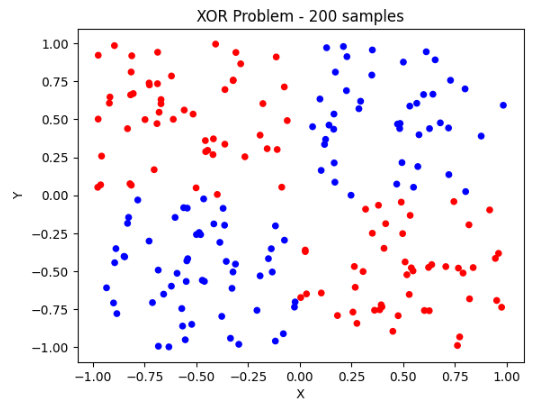

El árbol más simple que clasifica bien todos los puntos es el siguiente:

`Nodo1: x > 0 ? Nodo2 : Nodo3`

`Nodo2: y > 0 ? 0 : 1`

`Nodo3: y > 0 ? 1 : 0`

El árbol generado es el siguiente: 

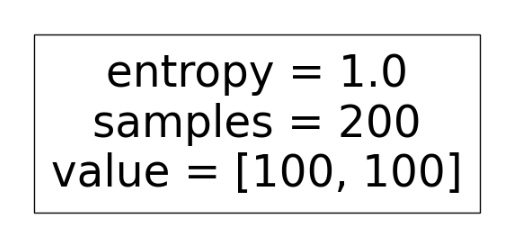

Vemos que el árbol de decisión no logra resolver el problema, es decir, clasificar correctamente los puntos con un grado de precisión mayor que el azar. Creemos que eso se debe a que cualquier condición de clasificación divide a ambas clases aproximadamente a la mitad y por lo tanto ninguna representa una ganacia de conocimineto suficiente como avanzar a otro nodo. El límite de mínima ganancia de información requerida se establece al crear el árbol.